In [1]:
import nxsdk.api.n2a as nx
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import RandomState
import sys

In [2]:
from banditAgent import Bandit

In [3]:
rs = RandomState(378902)

In [4]:
n_actions = 5
probabilities = rs.randint(0, 100, n_actions)
epsilon = 0.10

In [5]:
def get_rewards(rand_state, n_actions, lowest_r, highest_r, gap):
    
    highest = rand_state.randint(lowest_r, highest_r, 1)
    second_highest = highest - gap
    rest = rand_state.randint(0, second_highest, n_actions-2)
    
    probabilities = np.concatenate((highest, second_highest, rest))
    rand_state.shuffle(probabilities)
    
    return probabilities/100

In [6]:
x = get_rewards(rs, 5, 50, 60, 10)

In [7]:
x

array([0.42, 0.11, 0.23, 0.18, 0.52])

In [8]:
l_epoch = 128
episodes = 2000

In [9]:
bandit = Bandit(x, n_replicates=2, n_epochs = episodes, dynrange=2)

In [10]:
# dec_spks = agent.decoder.get_outputs().probe(nx.ProbeParameter.SPIKE)
# enc_spks = agent.encoder.blocks['summator'].get_outputs().probe(nx.ProbeParameter.SPIKE)
# hc_spks = agent.hippocampus.blocks['state_memory'].get_outputs().probe(nx.ProbeParameter.SPIKE)
# pun_spks = agent.hippocampus.blocks['punishment_gate'].get_outputs().probe(nx.ProbeParameter.SPIKE)
# rwd_spks = agent.hippocampus.blocks['reward_gate'].get_outputs().probe(nx.ProbeParameter.SPIKE)
ctx_spks = bandit.cortex.get_outputs().probe(nx.ProbeParameter.SPIKE)


In [11]:
unwrap = lambda x: x[0].data

In [12]:
runs=1

In [13]:
bandit.n_actions

5

In [14]:
bandit.probabilities

array([42, 11, 23, 18, 52])

In [15]:
bandit.cortex.blocks['estimates'].compartments['memory'].numNodes

10

In [16]:
results = []
for i in range(runs):
    results.append(bandit.run(episodes))

INFO:DRV:  SLURM is being run in background
INFO:DRV:  Connecting to 10.212.98.106:42441
INFO:DRV:      Host server up..............Done 0.33s
INFO:DRV:      Encoding axons/synapses.....Done 0.02s
Compiling in directory : /homes/wolin/python3_venv/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592420148.0047083
Include dir is : /homes/wolin/reinforcement_learning/bandit
Compiling -c /homes/wolin/python3_venv/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592420148.0047083/initnetwork_0_0.c
gcc -Wall -I/homes/wolin/reinforcement_learning/bandit -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /homes/wolin/python3_venv/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1592420148.0047083/initnetwork_0_0.c.o -c /homes/wolin/python3_venv/lib/python3.5/site-packages/nxsdk/driver/compilers/

In [17]:
bandit.board.disconnect()

INFO:HST:  chip=0 cpu=0 halted, status=0x0


In [18]:
bandit.cortex.shape

(5, 1, 2)

In [19]:
results

[(array([[1],
         [2],
         [0],
         ...,
         [4],
         [4],
         [4]]),
  array([-1, -1, -1, ..., -1, -1,  1]),
  array([[116., 117., 116., 116., 116.],
         [124., 124., 124., 124., 124.],
         [124., 123., 122., 124., 124.],
         ...,
         [115., 108., 108., 106., 140.],
         [115., 108., 108., 105., 140.],
         [115., 108., 109., 107., 139.]]))]

In [20]:
actions, rewards, estimates = results[0]

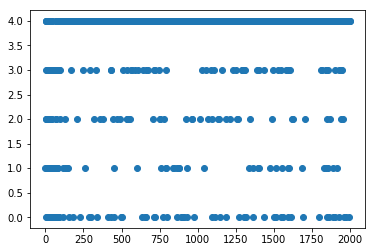

In [21]:
plt.scatter(np.arange(episodes), actions)

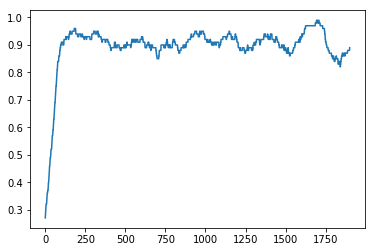

In [22]:
plt.plot(np.convolve((actions == 4).ravel()*1, np.ones(100), mode='valid')/100)

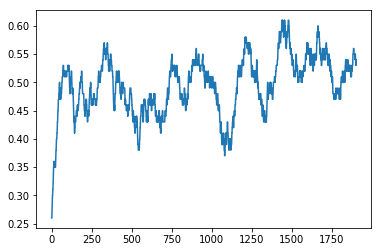

In [23]:
plt.plot(np.convolve((rewards+1)*0.5, np.ones(100), mode='valid')/100)

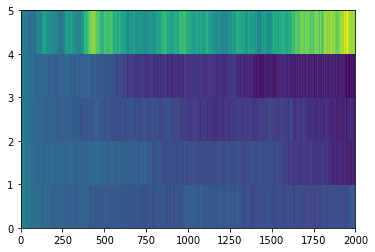

In [24]:
plt.pcolor(estimates.transpose())

In [25]:
unwrap(ctx_spks).shape

(10, 256000)

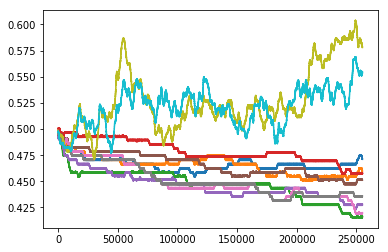

In [26]:
for i in range(10):
    plt.plot(np.convolve(unwrap(ctx_spks)[i,:], np.ones(1000), mode='valid')/1000)

In [32]:
avg = np.mean(unwrap(ctx_spks),axis=1)

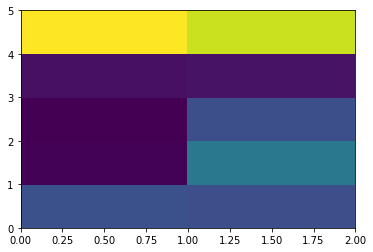

In [35]:
plt.pcolor(avg.reshape(5,2))